In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

plt.style.use(['science', 'notebook', 'grid'])


/tmp/ipykernel_9006/2455924816.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


Text(0, 0.5, 'zHD - zHEL')

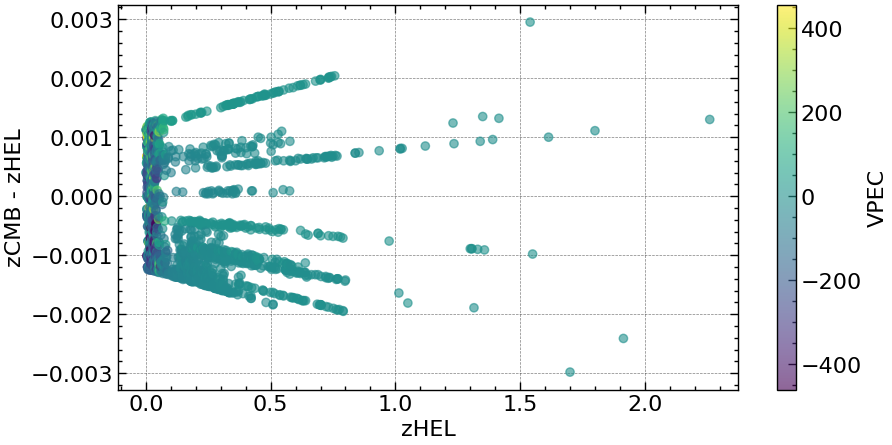

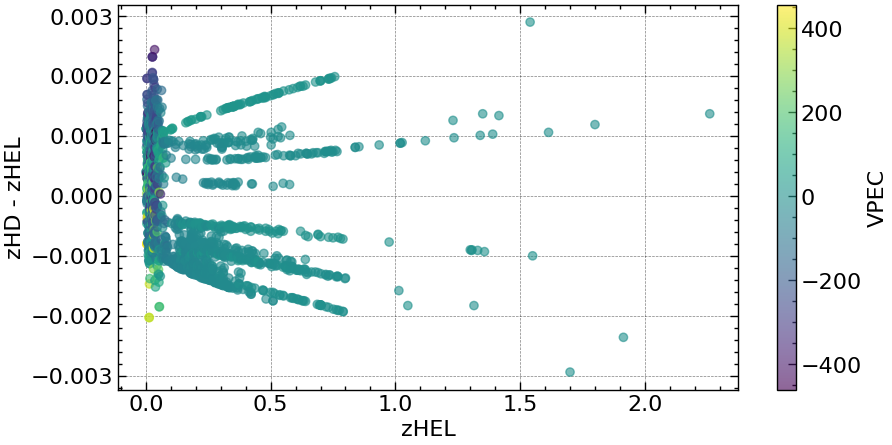

In [3]:
url='https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat'
df = pd.read_csv(url, delim_whitespace=True)
plt.figure(figsize=(10,5))
scatter = plt.scatter(df['zHEL'],df['zCMB']-df['zHEL'], c=df['VPEC'], cmap='viridis',alpha=0.6)
plt.colorbar(scatter, label='VPEC')
plt.xlabel('zHEL')
plt.ylabel('zCMB - zHEL')

plt.figure(figsize=(10,5))
scatter = plt.scatter(df['zHEL'],df['zHD']-df['zHEL'], c=df['VPEC'], cmap='viridis',alpha=0.6)
plt.colorbar(scatter, label='VPEC')
plt.xlabel('zHEL')
plt.ylabel('zHD - zHEL')

In [4]:
def dipole(A, B, ra0, dec0, ra, dec):
    coord = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    coord0 = SkyCoord(ra=ra0*u.degree, dec=dec0*u.degree, frame='icrs')
    sep = coord.separation(coord0)
    theta = sep.degree
    return A + B * np.cos(np.radians(theta))

from scipy.optimize import minimize

def objective(params):
    A, B, ra0, dec0 = params
    predicted = dipole(A, B, ra0, dec0, np.array(df['RA']), np.array(df['DEC']))
    residuals = (df['zCMB'] - df['zHEL']) - predicted
    return np.sum(residuals**2)

minimize_result = minimize(objective, x0=[0.01, 0.001, 128, 2])
print(minimize_result)







  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.482679178683895e-05
        x: [-4.329e-05  1.449e-03  1.671e+02 -1.602e+00]
      nit: 40
      jac: [ 6.414e-07  7.686e-07  5.639e-11  3.092e-11]
 hess_inv: [[ 3.955e-04  1.611e-04  8.485e+00 -1.461e+01]
            [ 1.611e-04  7.588e-04 -4.530e+00 -1.625e+01]
            [ 8.485e+00 -4.530e+00  1.779e+06 -7.214e+05]
            [-1.461e+01 -1.625e+01 -7.214e+05  3.248e+06]]
     nfev: 255
     njev: 51


(array([  0.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   2.,   2.,
          2.,   0.,   0.,   2.,   3.,   7.,   2.,   6.,  18.,  21.,  19.,
         27.,  16.,  44.,  34.,  51.,  75., 409., 515.,  99.,  49.,  57.,
         29.,  32.,  42.,  18.,  18.,   7.,   7.,   6.,  14.,   1.,   9.,
          5.,   1.,   4.,   1.,   0.,   3.,   3.,   8.,   0.,   4.,   5.,
          3.,   0.,   0.,   1.]),
 array([-0.2       , -0.19322034, -0.18644068, -0.17966102, -0.17288136,
        -0.16610169, -0.15932203, -0.15254237, -0.14576271, -0.13898305,
        -0.13220339, -0.12542373, -0.11864407, -0.11186441, -0.10508475,
        -0.09830508, -0.09152542, -0.08474576, -0.0779661 , -0.07118644,
        -0.06440678, -0.05762712, -0.05084746, -0.0440678 , -0.03728814,
        -0.03050847, -0.02372881, -0.01694915, -0.01016949, -0.00338983,
         0.00338983,  0.01016949,  0.01694915,  0.02372881,  0.03050847,
         0.03728814,  0.0440678 ,  0.05084746,  0.05762712,  0.06440678,
         0.0

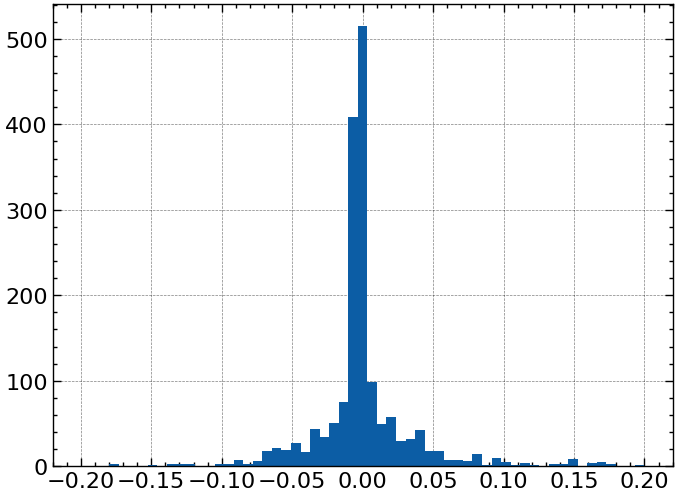

In [9]:
bins = np.linspace(-0.2, 0.2, 60)
plt.hist((df['zCMB']-df['zHEL'])/df['zHEL'], bins=bins)

In [6]:
mask =df['zCMB']<0.01
print(np.mean(df[mask]['zCMB']-df[mask]['zHEL']))

mask =df['zCMB']>0.03
print(np.mean(df[mask]['zCMB']-df[mask]['zHEL']))

0.00029274336283185835
-0.0004860374288039063


/home/shin101/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shin101/.local/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


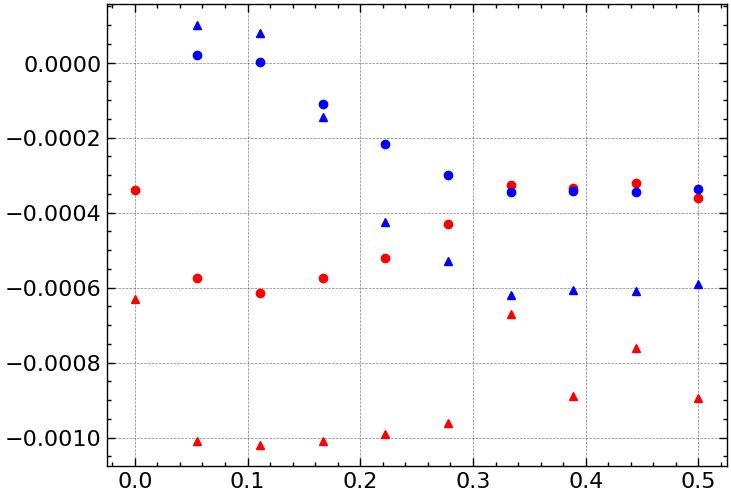

In [7]:
zref= np.linspace(0,0.5,10)
for z in zref:
    mask = df['zCMB']>z
    plt.plot(z, np.mean(df[mask]['zCMB']-df[mask]['zHEL']), 'ro')
    plt.plot(z,np.median(df[mask]['zCMB']-df[mask]['zHEL']), 'r^')
    mask2 = df['zCMB']<z
    plt.plot(z, np.mean(df[mask2]['zCMB']-df[mask2]['zHEL']), 'bo')
    plt.plot(z,np.median(df[mask2]['zCMB']-df[mask2]['zHEL']), 'b^')